In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams['animation.html'] = 'jshtml'

In [2]:
N = 60
L=2*np.pi
dx = L/N
x = np.linspace(0,L,N)
f = (x)/2/np.pi # linear function

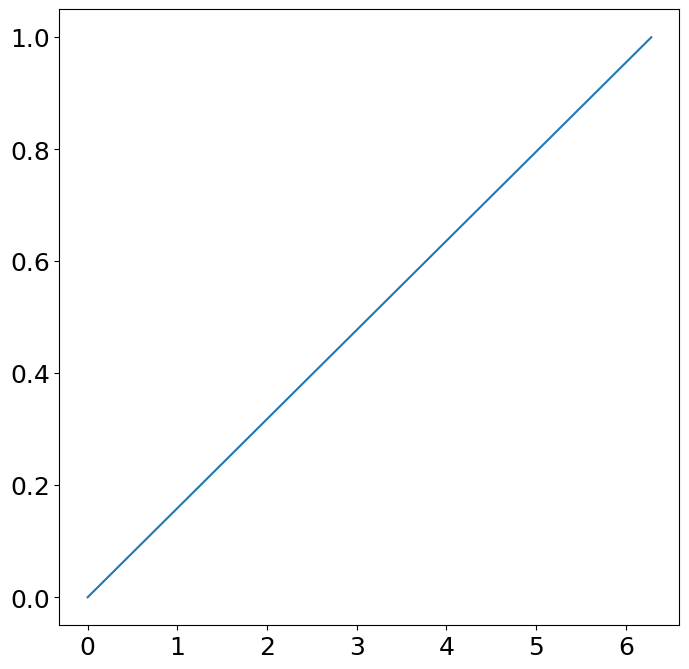

In [3]:
plt.plot(x,f);

In [4]:
k = 2*(np.pi/L)*np.arange(-N/2,N/2)
ks  = np.fft.fftshift(k)
ks

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29., -30., -29., -28.,
       -27., -26., -25., -24., -23., -22., -21., -20., -19., -18., -17.,
       -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,
        -5.,  -4.,  -3.,  -2.,  -1.])

In [5]:
np.fft.fftfreq(N,d=dx) * 2*np.pi

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29., -30., -29., -28.,
       -27., -26., -25., -24., -23., -22., -21., -20., -19., -18., -17.,
       -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,
        -5.,  -4.,  -3.,  -2.,  -1.])

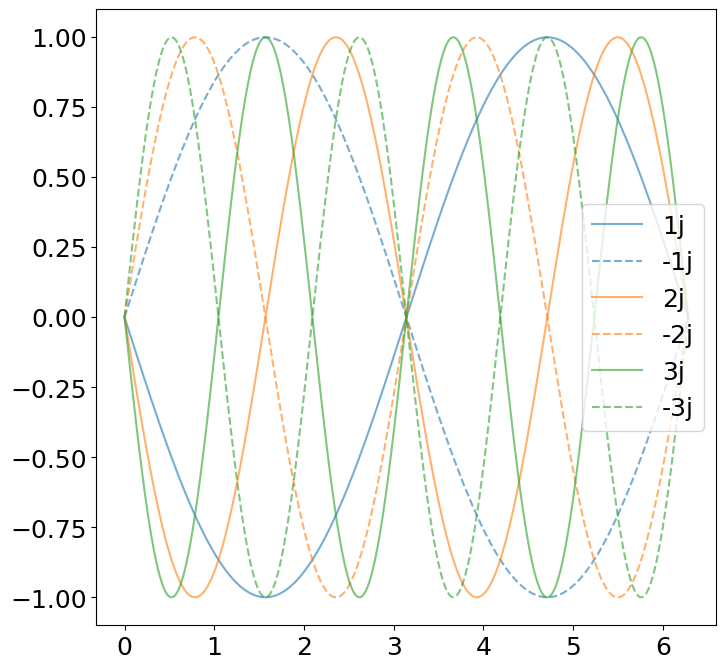

In [6]:
fig, ax = plt.subplots()
fig.set_size=(16,8)
for i in range(1,4):
    xt =  np.linspace(0,L,N*30)
#    plt.plot(xt, np.real(np.exp(-1j*ks[i]*xt)),alpha=.4,label=str(i))
#    plt.plot(xt, np.real(np.exp(-1j*ks[-i]*xt)),alpha=.4,label=str(i))
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(xt, np.imag(np.exp(-1j*ks[i]*xt)),alpha=.6,c=color,label=str(i)+"j")
    plt.plot(xt, np.imag(np.exp(-1j*ks[-i]*xt)),"--",alpha=.6,c=color,label="-"+str(i)+"j")
plt.legend();

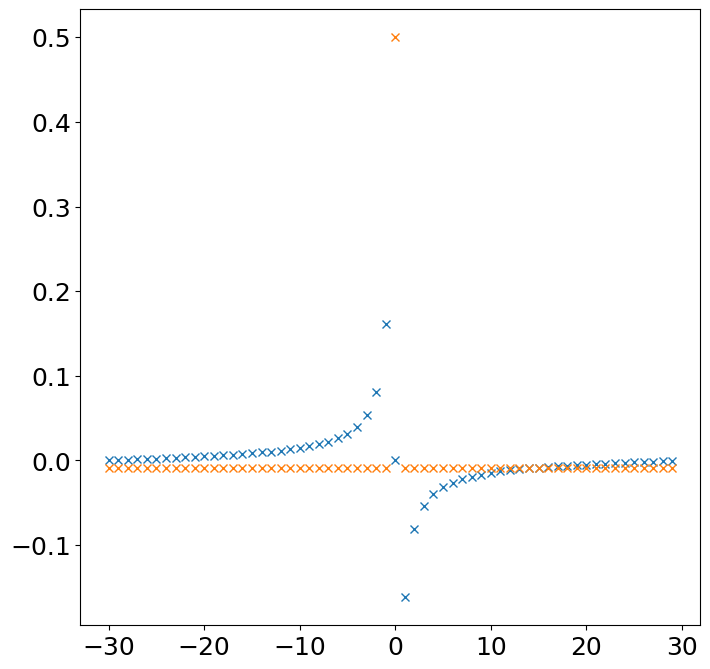

In [7]:
ft = np.fft.ifft(f)
plt.plot(ks, ft.imag,'x');
plt.plot(ks, ft.real,'x');

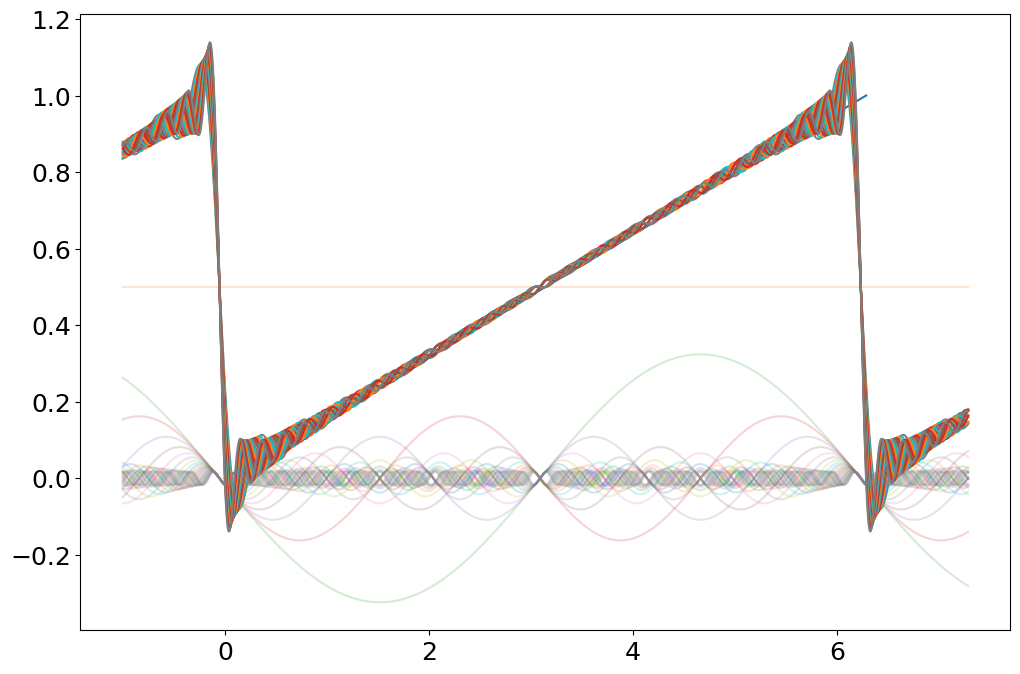

In [8]:
N = len(x)
N21 = N//2+1
xt =  np.linspace(-1,L+1,N*30)
fig = plt.figure(figsize=(12,8))
plt.plot(x,f)
zt = np.zeros(N*30, "complex")
for i in range(0,N21):
    j = i
    jm = -i
#    print(ks[j],ks[jm])
    z = ft[j]*np.exp(-1j*ks[j]*xt) 
    if (j > 0):
        z += ft[jm]*np.exp(-1j*ks[jm]*xt)
    zt += z
    plt.plot(xt,np.real(z),alpha=.2)
    if (i > 14):
        plt.plot(xt,np.real(zt))



/var/folders/8h/csrqy1dd1x1d93qvzyh33kn40000gn/T/ipykernel_95526/4251703839.py:21: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  ln.set_data(xdata, ydata)


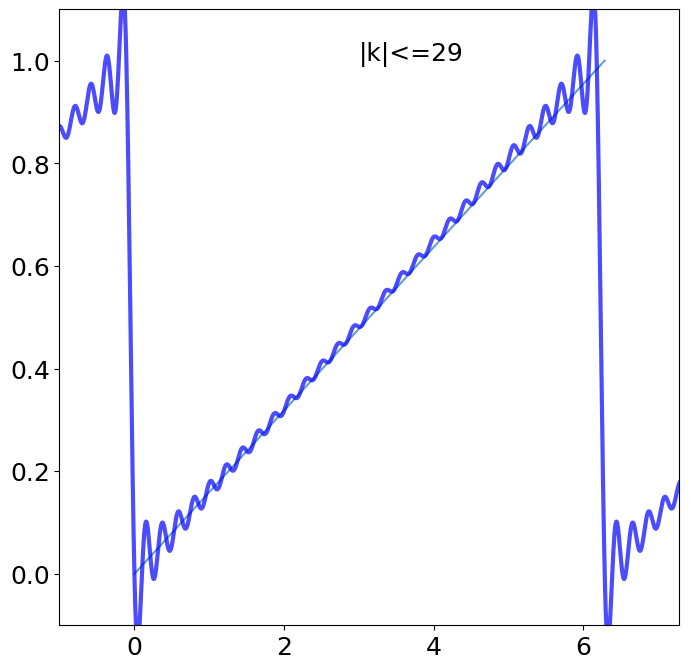

In [15]:

fig, ax = plt.subplots()
xdata, ydata = [], []
plt.plot(x,f,alpha=0.7);
ln, = plt.plot([], [], 'b-',lw=3,alpha=0.7);
annotation = ax.annotate('Fourier approx k<=', xy=(3,1.0) );

def init():
    fig = plt.figure(figsize=(12,8))
#    plt.plot(x,f)
    ax.set_xlim(-1, 2*np.pi+1)
    ax.set_ylim(-0.1, 1.1)
    plt.close()
    return ln,

def update(frame):
    xdata = xt
    z = ft[0]
    [z := z +  ft[j]*np.exp(-1j*xt*ks[j])+ft[-j]*np.exp(-1j*xt*ks[-j]) for j in range(1,frame)]
    ydata = np.real(z)
    annotation.set_text("|k|<="+str(frame-1))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.arange(1,N21),
                    init_func=init, blit=True);
HTML(ani.to_jshtml())

(-2.0, 2.0)

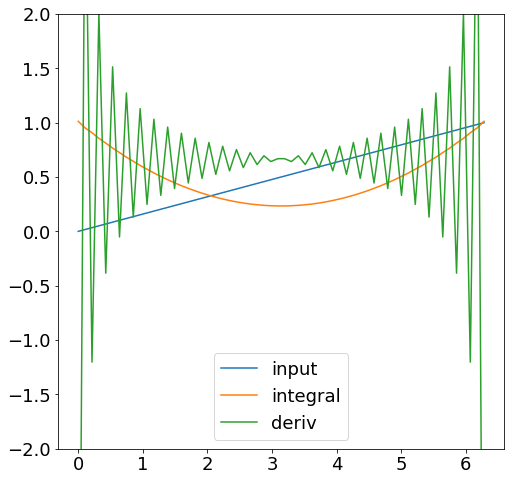

In [74]:
u = ft.copy()
v = ft.copy()
u[1:] = ft[1:]/(-1j * ks[1:])
u[0]  = ft[0]
u = np.fft.fft(u)
v[0] = ft[0]
v[1:] = ft[1:]*(-1j * ks[1:])
v = np.fft.fft(v)

plt.plot(x,f,label="input")
plt.plot(x,np.real(u),label="integral")
plt.plot(x,np.real(v),label="deriv")
plt.legend()
plt.ylim(-2,2)

In [17]:
from scipy.stats import norm
fg = norm.pdf(x,loc=np.pi)

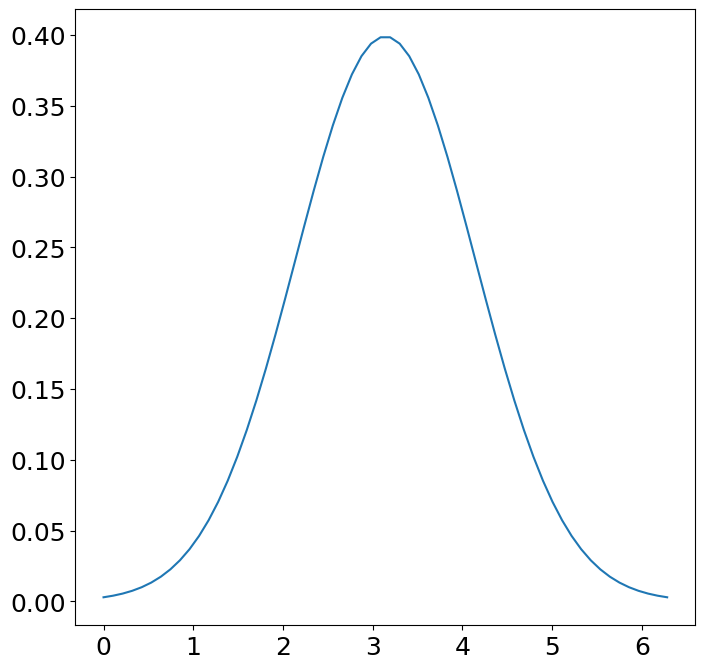

In [18]:
plt.plot(x,fg)

/var/folders/8h/csrqy1dd1x1d93qvzyh33kn40000gn/T/ipykernel_95526/4156629935.py:23: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  ln.set_data(xdata, ydata)


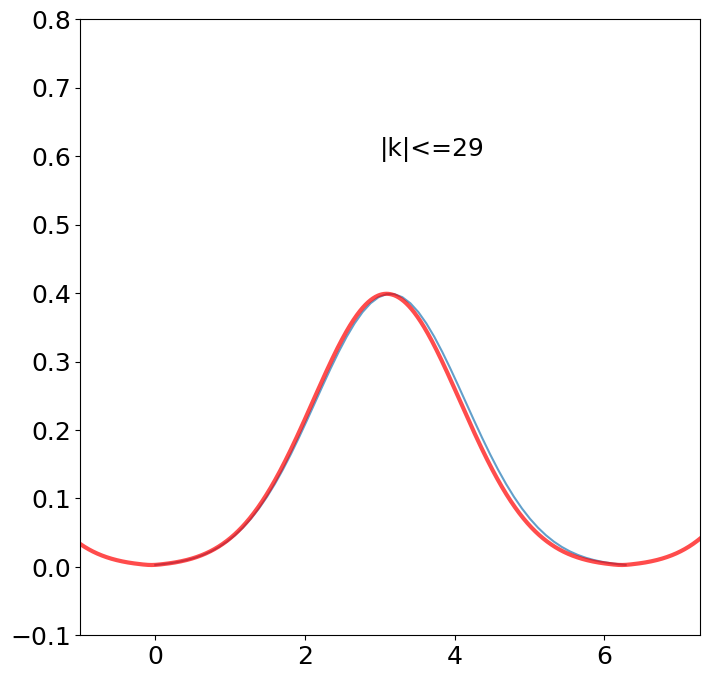

In [21]:
fgt = np.fft.ifft(fg)

fig, ax = plt.subplots()
xdata, ydata = [], []
plt.plot(x,fg,alpha=0.7)
ln, = plt.plot([], [], 'r-',lw=3,alpha=0.7)
annotation = ax.annotate('Fourier approx k<=', xy=(3,0.6) )

def init():
    fig = plt.figure(figsize=(12,8))
    ax.set_xlim(-1, 2*np.pi+1)
    ax.set_ylim(-0.1, .8)
    plt.close()
    return ln,

def update(frame):
    xdata = xt
    z = fgt[0]
#    [z := z -  1j*ks[j]*fgt[j]*exp(-1j*xt*ks[j]) - 1j*ks[-j]*fgt[-j]*exp(-1j*xt*ks[-j]) for j in range(0,frame)]
    [z := z + fgt[j]*np.exp(-1j*xt*ks[j]) + fgt[-j]*np.exp(-1j*xt*ks[-j]) for j in range(1,frame)]
    ydata = np.real(z)
    annotation.set_text("|k|<="+str(frame-1))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.arange(1,N21),
                    init_func=init, blit=True);
HTML(ani.to_jshtml())

In [85]:
o = np.zeros(N)

g = o + (0j) * o  # initialize complex array

(g[3]) = complex(0,1)

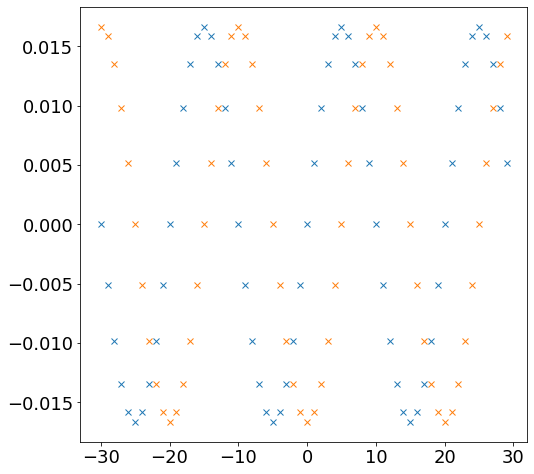

In [86]:
gt = np.fft.ifft(g)
plt.plot(k, gt.real,"x")
plt.plot(k, gt.imag,"x")


In [79]:
z.imag = 3

AttributeError: readonly attribute